# Покажем, что плотные слои умеют далеко не все

# Делаем импорты

### По уже знакомой схеме

In [1]:
import numpy
import keras
from keras import backend as K
from keras.datasets import mnist, cifar10
from keras.utils import np_utils
import tensorflow as tf

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10057152005411787350
]


In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

from keras.layers import Dense, Dropout,Flatten
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [5]:
from keras.models import Sequential
import pandas as pd

In [6]:
K.set_image_data_format('channels_last')
numpy.random.seed(0)

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

# Смотрим на данные

In [8]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

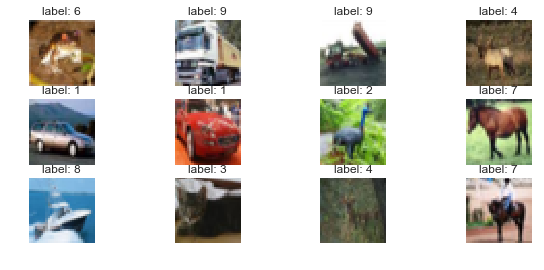

In [10]:
images_and_labels = list(zip(x_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('label: %i' % label )

## Форматируем данные

In [11]:
num_classes = 10
batch_size = 128
epochs = 10

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


(50000, 'train samples')
(10000, 'test samples')


In [12]:
x_train.shape

(50000, 3072)

# Учим модель

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [15]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()


## Новая фишка: рисуем схему

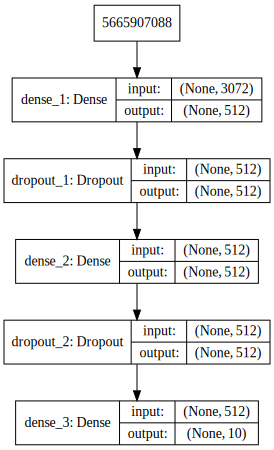

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=14,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 50000 samples, validate on 10000 samples
Epoch 1/14
50000/50000 [==============================] - 13s 253us/step - loss: 1.6082 - acc: 0.4200 - val_loss: 1.5750 - val_acc: 0.4383
Epoch 2/14
50000/50000 [==============================] - 13s 252us/step - loss: 1.5990 - acc: 0.4225 - val_loss: 1.5221 - val_acc: 0.4632
Epoch 3/14
50000/50000 [==============================] - 13s 255us/step - loss: 1.5907 - acc: 0.4255 - val_loss: 1.5425 - val_acc: 0.4589
Epoch 4/14
50000/50000 [==============================] - 13s 251us/step - loss: 1.5891 - acc: 0.4264 - val_loss: 1.5360 - val_acc: 0.4599
Epoch 5/14
50000/50000 [==============================] - 13s 267us/step - loss: 1.5771 - acc: 0.4309 - val_loss: 1.5475 - val_acc: 0.4463
Epoch 6/14
50000/50000 [==============================] - 15s 297us/step - loss: 1.5694 - acc: 0.4353 - val_loss: 1.5183 - val_acc: 0.4680
Epoch 7/14
50000/50000 [==============================] - 14s 283us/step - loss: 1.5737 - acc: 0.4345 - val_loss: 1.

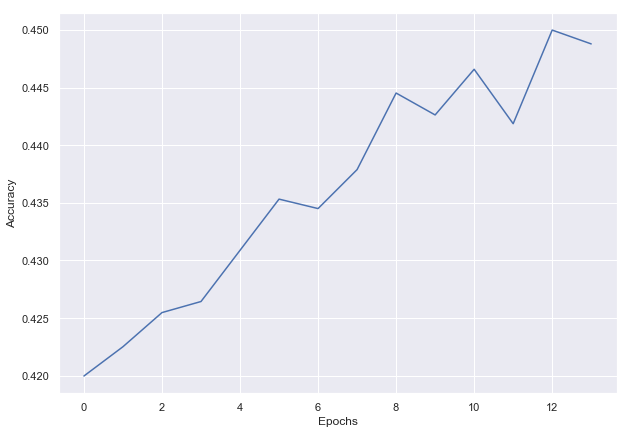

In [22]:
plt.plot(range(len(history.acc)), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()